In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [2]:
image_path = "/content/drive/MyDrive/license_plate.png"
image = cv2.imread(image_path)
denoised_image = cv2.fastNlMeansDenoisingColored(image)
gray = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

plt.figure(figsize = (250, 100))
plt.subplot(4,1, 1)
io.imshow(image)
plt.subplot(4,1, 2)
io.imshow(denoised_image)
plt.subplot(4, 1, 3)
io.imshow(gray)
plt.subplot(4, 1, 4)
io.imshow(thresh)

In [3]:
nLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 4)
print("Total unique labels detected is {}.".format(nLabels))

Total unique labels detected is 14.


[INFO] connected component '3'
[INFO] connected component '5'
[INFO] connected component '6'
[INFO] connected component '7'
[INFO] connected component '8'
[INFO] connected component '9'
[INFO] connected component '10'


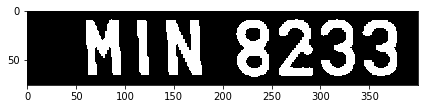

In [4]:
mask = np.zeros(gray.shape, dtype='uint8')
new_labels = []
for i in range(1, nLabels):
	# extract the connected component statistics for the current
	# label
  x = stats[i, cv2.CC_STAT_LEFT]
  y = stats[i, cv2.CC_STAT_TOP]
  w = stats[i, cv2.CC_STAT_WIDTH]
  h = stats[i, cv2.CC_STAT_HEIGHT]
  area = stats[i, cv2.CC_STAT_AREA]

  keepHeight = h > 45 and h < 100 
  keepWidth = w > 5 and w < 65
  keepArea = area > 500 and area < 1500

  if all((keepHeight, keepWidth, keepArea)):
    print("[INFO] connected component '{}'".format(i))
    new_labels.append(i)
    componentMask = (labels == i).astype("uint8") * 255
    mask = cv2.bitwise_or(mask, componentMask)
io.imshow(mask)



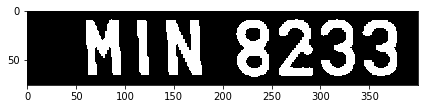

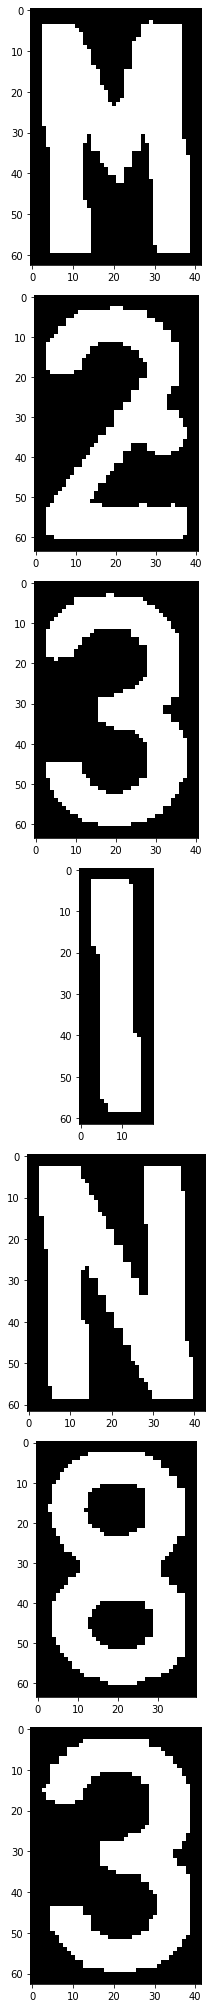

In [5]:
image_list = []
smooth_image = cv2.bilateralFilter(mask, 5, 10, 10)
io.imshow(smooth_image)
for i in new_labels:
  x = stats[i, cv2.CC_STAT_LEFT]
  y = stats[i, cv2.CC_STAT_TOP]
  w = stats[i, cv2.CC_STAT_WIDTH]
  h = stats[i, cv2.CC_STAT_HEIGHT]
  img = smooth_image.copy()
  crop_img = img[y - 3: y + h + 3, x - 3: x + w + 3]
  image_list.append(crop_img)

plt.figure(figsize=(28, 28))
for i in range(len(image_list)):
  plt.subplot(len(image_list), 1, i+1)
  io.imshow(image_list[i])
